In [1]:
import matplotlib.gridspec as gridspec
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import Normalize, LogNorm
import matplotlib.gridspec as gridspec
import numpy as np
import scqubits
from tqdm import tqdm
from IPython.display import clear_output
from functools import partial

from CoupledQuantumSystems.noise import first_order_derivative,second_order_derivative,get_frequency,diel_spectral_density,one_over_f_spectral_density,T_phi

In [2]:
Q_cap = 1e5
one_over_f_flux_noise_amplitude = 1e-6
temp_in_mK = 20

UIFQ_diel_T1_array = []
UIFQ_1overf_T1_array = []
UIFQ_T1_array = []
gf_Tphi_array = []
derivative_array = []

def get_data(EJoverEC):
    EJ = 4
    EJoverEL = 30
    EC = EJ / EJoverEC
    EL = EJ / EJoverEL

    UIFQ = scqubits.Fluxonium(EJ = EJ,EC = EJ/EJoverEC,EL = EJ/EJoverEL, cutoff =110,flux = 0,truncated_dim=20)
    UIFQ_element = np.abs(UIFQ.matrixelement_table('phi_operator',evals_count=3)[1,2]) 
    UIFQ_freq = (UIFQ.eigenvals()[2]-UIFQ.eigenvals()[1]) * 2 * np.pi
    gf_derivative = second_order_derivative(partial(get_frequency, EJ = EJ,EC = EJ/EJoverEC,EL=EJ/EJoverEL,i=0,j=2),x0=0)

    UIFQ_dielectric_lifetime = 1 / (np.abs(UIFQ_element)**2 * diel_spectral_density(UIFQ_freq, EC,temp_in_mK,Q_cap)) / 1e6
    UIFQ_one_over_f_loss_lifetime = 1 / (np.abs(UIFQ_element)**2 * one_over_f_spectral_density(UIFQ_freq, EL,one_over_f_flux_noise_amplitude ))  / 1e6
    gf_dephasing_lifetime = T_phi(gf_derivative, one_over_f_flux_noise_amplitude) / 1e6

    return UIFQ_dielectric_lifetime, UIFQ_one_over_f_loss_lifetime, gf_dephasing_lifetime, gf_derivative

# for EJoverEC in tqdm(np.linspace(1,8,100),desc='looping'):
#     UIFQ_dielectric_lifetime, UIFQ_one_over_f_loss_lifetime, gf_dephasing_lifetime, gf_derivative = get_data(EJoverEC)
#     UIFQ_T1 =1/(1/UIFQ_dielectric_lifetime + 1/UIFQ_one_over_f_loss_lifetime)

#     UIFQ_diel_T1_array.append(UIFQ_dielectric_lifetime)
#     UIFQ_1overf_T1_array.append(UIFQ_one_over_f_loss_lifetime)
#     UIFQ_T1_array.append(UIFQ_T1)
#     gf_Tphi_array.append(gf_dephasing_lifetime)
#     derivative_array.append(gf_derivative)
#     clear_output()

# import pickle

# # Create a dictionary to store the lists
# data_to_store = {
#     'UIFQ_diel_T1_array': UIFQ_diel_T1_array,
#     'UIFQ_1overf_T1_array': UIFQ_1overf_T1_array,
#     'UIFQ_T1_array': UIFQ_T1_array,
#     'gf_Tphi_array': gf_Tphi_array,
#     'derivative_array':derivative_array
# }

# # Save the dictionary to a pickle file
# with open('gf-data_new.pkl', 'wb') as f:
#     pickle.dump(data_to_store, f)

In [3]:
import pickle

# Load the dictionary from the pickle file
with open('gf-data_new.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

# Extract the lists from the dictionary
UIFQ_diel_T1_array = loaded_data['UIFQ_diel_T1_array']
UIFQ_1overf_T1_array = loaded_data['UIFQ_1overf_T1_array']
UIFQ_T1_array = loaded_data['UIFQ_T1_array']
gf_Tphi_array = loaded_data['gf_Tphi_array']
derivative_array = loaded_data['derivative_array']

In [5]:
Q_cap = 1e5
one_over_f_flux_noise_amplitude = 1e-6


UIFQ_diel_T1_array_sweep_flux = []
UIFQ_1overf_T1_array_sweep_flux = []
UIFQ_T1_array_sweep_flux = []
gf_Tphi_array_sweep_flux = []
gf_diel_T1_array_sweep_flux = []
gf_1overf_T1_array_sweep_flux = []
gf_T1_array_sweep_flux = []

def get_data_sweep_flux(flux):
    EJ = 4
    EJoverEC = 2
    EJoverEL = 30
    EC = EJ / EJoverEC
    EL = EJ / EJoverEL

    IFQ = scqubits.Fluxonium(EJ = EJ,EC = EJ/EJoverEC,EL = EJ/EJoverEL, cutoff =110,flux = flux,truncated_dim=20)
    UIFQ_element = np.abs(IFQ.matrixelement_table('phi_operator',evals_count=3)[1,2]) 
    UIFQ_freq = (IFQ.eigenvals()[2]-IFQ.eigenvals()[1]) * 2 * np.pi
    UIFQ_dielectric_lifetime = 1 / (np.abs(UIFQ_element)**2 * diel_spectral_density(UIFQ_freq, EC,temp_in_mK,Q_cap)) / 1e6
    UIFQ_one_over_f_loss_lifetime = 1 / (np.abs(UIFQ_element)**2 * one_over_f_spectral_density(UIFQ_freq, EL,one_over_f_flux_noise_amplitude ))  / 1e6
    
    gf_1st_derivative = first_order_derivative(partial(get_frequency, EJ = EJ,EC = EJ/EJoverEC,EL=EJ/EJoverEL,i=0,j=2),x0=flux)
    gf_2nd_derivative = second_order_derivative(partial(get_frequency, EJ = EJ,EC = EJ/EJoverEC,EL=EJ/EJoverEL,i=0,j=2),x0=flux)
    gf_dephasing_lifetime = T_phi(gf_2nd_derivative, one_over_f_flux_noise_amplitude,gf_1st_derivative) / 1e6

    gf_element = np.abs(IFQ.matrixelement_table('phi_operator',evals_count=3)[0,2]) 
    gf_freq = (IFQ.eigenvals()[2]-IFQ.eigenvals()[0]) * 2 * np.pi
    gf_dielectric_lifetime = 1 / (np.abs(gf_element)**2 * diel_spectral_density(gf_freq, EC,temp_in_mK,Q_cap)) / 1e6
    gf_one_over_f_loss_lifetime = 1 / (np.abs(gf_element)**2 * one_over_f_spectral_density(gf_freq, EL,one_over_f_flux_noise_amplitude ))  / 1e6

    return UIFQ_dielectric_lifetime, UIFQ_one_over_f_loss_lifetime, gf_dephasing_lifetime, gf_dielectric_lifetime, gf_one_over_f_loss_lifetime

flux_array = np.logspace(-7, -3, num=50)

# for flux in tqdm(flux_array,desc='looping'):
#     UIFQ_dielectric_lifetime, UIFQ_one_over_f_loss_lifetime, gf_dephasing_lifetime, gf_dielectric_lifetime, gf_one_over_f_loss_lifetime = get_data_sweep_flux(flux)
#     UIFQ_T1 = 1/(1/UIFQ_dielectric_lifetime + 1/UIFQ_one_over_f_loss_lifetime)
#     gf_T1 = 1/(1/gf_dielectric_lifetime + 1/gf_one_over_f_loss_lifetime)
#     UIFQ_diel_T1_array_sweep_flux.append(UIFQ_dielectric_lifetime)
#     UIFQ_1overf_T1_array_sweep_flux.append(UIFQ_one_over_f_loss_lifetime)
#     gf_diel_T1_array_sweep_flux.append(gf_dielectric_lifetime)
#     gf_1overf_T1_array_sweep_flux.append(gf_one_over_f_loss_lifetime)
#     UIFQ_T1_array_sweep_flux.append(UIFQ_T1)
#     gf_T1_array_sweep_flux.append(gf_T1)
#     gf_Tphi_array_sweep_flux.append(gf_dephasing_lifetime)
#     clear_output()
    
# import pickle

# # Create a dictionary to store the lists
# data_to_store = {
#     'UIFQ_diel_T1_array_sweep_flux': UIFQ_diel_T1_array_sweep_flux,
#     'UIFQ_1overf_T1_array_sweep_flux': UIFQ_1overf_T1_array_sweep_flux,
#     'gf_diel_T1_array_sweep_flux': gf_diel_T1_array_sweep_flux,
#     'gf_1overf_T1_array_sweep_flux': gf_1overf_T1_array_sweep_flux,
#     'UIFQ_T1_array_sweep_flux':UIFQ_T1_array_sweep_flux,
#     'gf_T1_array_sweep_flux':gf_T1_array_sweep_flux,
#     'gf_Tphi_array_sweep_flux':gf_Tphi_array_sweep_flux,

# }

# # Save the dictionary to a pickle file
# with open('gf-data_sweep_flux_new.pkl', 'wb') as f:
#     pickle.dump(data_to_store, f)

In [6]:
import pickle

# Load the dictionary from the pickle file
with open('gf-data_sweep_flux_new.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

# Extract the lists from the dictionary
UIFQ_diel_T1_array_sweep_flux = loaded_data['UIFQ_diel_T1_array_sweep_flux']
UIFQ_1overf_T1_array_sweep_flux = loaded_data['UIFQ_1overf_T1_array_sweep_flux']
gf_diel_T1_array_sweep_flux = loaded_data['gf_diel_T1_array_sweep_flux']
gf_1overf_T1_array_sweep_flux = loaded_data['gf_1overf_T1_array_sweep_flux']
UIFQ_T1_array_sweep_flux = loaded_data['UIFQ_T1_array_sweep_flux']
gf_T1_array_sweep_flux = loaded_data['gf_T1_array_sweep_flux']
gf_Tphi_array_sweep_flux = loaded_data['gf_Tphi_array_sweep_flux']

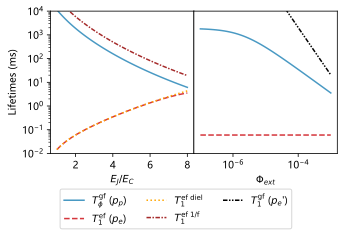

In [11]:
fig = plt.figure(figsize=(5, 3.2)) 
gs0 = fig.add_gridspec(nrows=1, ncols=1,left=0.15, right=0.55,bottom=0.35,top = 0.97)
gs1 = fig.add_gridspec(nrows=1, ncols=1,left=0.55, right=0.95,bottom=0.35,top = 0.97)

################################################
#   subplot 1 
################################################
ax = fig.add_subplot(gs0[0])


ax.plot(np.linspace(1,8,100), gf_Tphi_array, color= '#4999c3',label = rf'$T_\phi^\text{{gf}}$ ($p_p$)',linestyle='-')
ax.plot(np.linspace(1,8,100), UIFQ_T1_array, color= '#d5373d',label = rf'$T_1^\text{{ef}}$ ($p_e$)',linestyle='--')

ax.plot(np.linspace(1,8,100), UIFQ_diel_T1_array, color= 'orange',label = rf'$T_1^\text{{ef diel}}$',linestyle=':')
ax.plot(np.linspace(1,8,100), UIFQ_1overf_T1_array, color= 'brown',label = rf'$T_1^\text{{ef 1/f}}$',linestyle=(0,(3,1,1,1)))

ymin = 1e-2
ymax = 1e4
ax.set_ylim(ymin, ymax)

ax.set_yscale('log')
ax.set_xlabel(r'$E_J/E_C$')
ax.set_ylabel(r'Lifetimes (ms)')

handles1, labels1 = ax.get_legend_handles_labels()

################################################
#   subplot 2
################################################

ax = fig.add_subplot(gs1[0])

ax.plot( flux_array, gf_Tphi_array_sweep_flux, color= '#4999c3',linestyle='-')
ax.plot( flux_array, UIFQ_T1_array_sweep_flux, color= '#d5373d',linestyle='--')
ax.plot( flux_array, gf_T1_array_sweep_flux, color= 'black',label = rf"$T_1^\text{{gf}}$ ($p_e$')",linestyle=(0,(3,1,1,1,1,1)))

ax.set_ylim(ymin, ymax)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$\Phi_{ext}$')
ax.set_ylabel(r'Lifetimes (ms)')

ax.get_yaxis().set_visible(False)


handles2, labels2 = ax.get_legend_handles_labels()
handles = handles1 + handles2
labels = labels1 + labels2
fig.legend(handles, labels, loc='lower center',ncol = 3, bbox_to_anchor=(0.5, 0.0))
fig.savefig('gf_lifetimes_small_new.pdf')

Spectral data:   0%|          | 0/51 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/51 [00:00<?, ?it/s]

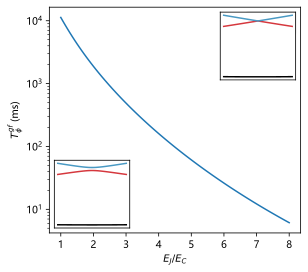

In [12]:
import numpy as np
import scqubits
import matplotlib.pyplot as plt
EJ = 3
EJoverEL = 30
EL = EJ / EJoverEL


fluxonium_light = scqubits.Fluxonium(
    EJ=EJ,
    EC= EJ / 2,
    EL=EL,
    cutoff = 110,
    flux = 0
)


fluxonium_heavy = scqubits.Fluxonium(
    EJ=EJ,
    EC= EJ / 7,
    EL=EL,
    cutoff = 110,
    flux = 0
)

flux_list = np.linspace(-0.05, 0.05, 51)

light_specdata = fluxonium_light.get_spectrum_vs_paramvals(
    'flux',
    flux_list,
    evals_count=3,
    subtract_ground=False,
    # num_cpus=6,
)
heavt_specdata = fluxonium_heavy.get_spectrum_vs_paramvals(
    'flux',
    flux_list,
    evals_count=3,
    subtract_ground=False,
    # num_cpus=6,
)

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig = plt.figure(figsize=(5, 3.7)) 
gs = fig.add_gridspec(nrows=1, ncols=1,left=0.15, right=0.85,bottom=0.12,top = 0.97)
ax = fig.add_subplot(gs[0])
ax.plot(np.linspace(1,8,100), gf_Tphi_array,label = rf'$T_\phi^{{gf}}$')


inset_a = inset_axes(ax, width="30%", height="30%", loc='upper right')
for arr,color in zip( heavt_specdata.energy_table.T,
                     ['black',  '#d5373d','#4999c3']):
    inset_a.plot(flux_list,arr,color=color)
inset_a.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)


inset_b = inset_axes(ax, width="30%", height="30%", loc='lower left')
for arr,color in zip(light_specdata.energy_table.T,
                     ['black',  '#d5373d','#4999c3']):
    inset_b.plot(flux_list,arr,color=color)
inset_b.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

ax.set_yscale('log')
ax.set_xlabel(r'$E_J/E_C$')
ax.set_ylabel(r'$T_\phi^{{gf}}$ (ms)')
ax.legend(ncol = 2,loc='upper right')
fig.savefig('gf_curvature_alt.pdf')

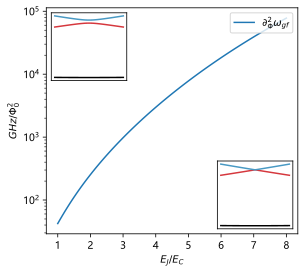

In [ ]:
import numpy as np
import scqubits
import matplotlib.pyplot as plt
EJ = 3
EJoverEL = 30
EL = EJ / EJoverEL


fluxonium_light = scqubits.Fluxonium(
    EJ=EJ,
    EC= EJ / 2,
    EL=EL,
    cutoff = 110,
    flux = 0
)


fluxonium_heavy = scqubits.Fluxonium(
    EJ=EJ,
    EC= EJ / 7,
    EL=EL,
    cutoff = 110,
    flux = 0
)

flux_list = np.linspace(-0.05, 0.05, 51)

light_specdata = fluxonium_light.get_spectrum_vs_paramvals(
    'flux',
    flux_list,
    evals_count=3,
    subtract_ground=False,
    # num_cpus=6,
)
heavt_specdata = fluxonium_heavy.get_spectrum_vs_paramvals(
    'flux',
    flux_list,
    evals_count=3,
    subtract_ground=False,
    # num_cpus=6,
)

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig = plt.figure(figsize=(5, 3.7)) 
gs = fig.add_gridspec(nrows=1, ncols=1,left=0.15, right=0.85,bottom=0.12,top = 0.97)
ax = fig.add_subplot(gs[0])
ax.plot(np.linspace(1,8,100), derivative_array,label = rf'$\partial_\Phi^2 \omega_{{gf}}$')


inset_a = inset_axes(ax, width="30%", height="30%", loc='lower right')
for arr,color in zip( heavt_specdata.energy_table.T,
                     ['black',  '#d5373d','#4999c3']):
    inset_a.plot(flux_list,arr,color=color)
inset_a.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)


inset_b = inset_axes(ax, width="30%", height="30%", loc='upper left')
for arr,color in zip(light_specdata.energy_table.T,
                     ['black',  '#d5373d','#4999c3']):
    inset_b.plot(flux_list,arr,color=color)
inset_b.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

ax.set_yscale('log')
ax.set_xlabel(r'$E_J/E_C$')
ax.set_ylabel(r'$GHz/\Phi_0^2$')
ax.legend(ncol = 2,loc='upper right')
fig.savefig('gf_curvature.pdf')